## Name: Nick Darrow
## UIN: 01178936
## Class: CS625
## Assignment HW5
## Date: 03/19/25


In [3]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
# Dataset 3, Q1
#import proper libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import data
URP = pd.read_csv("/content/11s0029.csv",thousands=',')
pd.DataFrame(URP)
URP.head(10)


,State,Post office abbreviation,Urban 1990 Former definition (percent),Urban 1990 Current definition (percent),"Total, 2000 (1,000)",Urban_Population_2000_Percent,Population Type,Total
0,California,CA,92.6,93.7,33872,94.4,"Urban Population_2000_Number (1,000)",31990
1,California,CA,92.6,93.7,33872,94.4,"Rural population, 2000 (1,000)",1882
2,Colorado,CO,82.4,83.8,4301,84.5,"Urban Population_2000_Number (1,000)",3633
3,Colorado,CO,82.4,83.8,4301,84.5,"Rural population, 2000 (1,000)",668
4,Connecticut,CT,79.1,87.0,3406,87.7,"Urban Population_2000_Number (1,000)",2988
5,Connecticut,CT,79.1,87.0,3406,87.7,"Rural population, 2000 (1,000)",418
6,Delaware,DE,73.0,79.2,784,80.1,"Urban Population_2000_Number (1,000)",628
7,Delaware,DE,73.0,79.2,784,80.1,"Rural population, 2000 (1,000)",156
8,District of Columbia,DC,100.0,100.0,572,100.0,"Urban Population_2000_Number (1,000)",572
9,District of Columbia,DC,100.0,100.0,572,100.0,"Rural population, 2000 (1,000)",0


### Data manipulations done in power query editor
below is the dax code used to do data manipulations. I had move some values around, rename some columns and replace some values, I really don't know how they use this format its inaccessible for data scientists.

In [ ]:
#do not run this here, it will not work
let
  Source = Csv.Document(File.Contents("/Users/hockeybro17/Downloads/11s0029.csv"), [Delimiter = ",", Columns = 8, Encoding = 65001, QuoteStyle = QuoteStyle.None]),
  #"Changed column type" = Table.TransformColumnTypes(Source, {{"Column1", type text}, {"Column2", type text}, {"Column3", type text}, {"Column4", type text}, {"Column5", type text}, {"Column6", type text}, {"Column7", type text}, {"Column8", type text}}),
  #"Removed top rows" = Table.Skip(#"Changed column type", 3),
  #"Replaced value" = Table.ReplaceValue(#"Removed top rows", "Former definition (percent)", "1990 Former definition (percent)", Replacer.ReplaceValue, {"Column3"}),
  #"Replaced value 1" = Table.ReplaceValue(#"Replaced value", "Current definition (percent)", "1990 Current definition (percent)", Replacer.ReplaceValue, {"Column4"}),
  #"Replaced value 2" = Table.ReplaceValue(#"Replaced value 1", "Number (1,000)", "Urban Population_2000_Number (1,000)", Replacer.ReplaceValue, {"Column6"}),
  #"Replaced value 3" = Table.ReplaceValue(#"Replaced value 2", "Percent", "Urban_Population_2000_Percent", Replacer.ReplaceValue, {"Column7"}),
  #"Replaced value 4" = Table.ReplaceValue(#"Replaced value 3", "1990 Former definition (percent)", "Urban 1990 Former definition (percent)", Replacer.ReplaceValue, {"Column3"}),
  #"Replaced value 5" = Table.ReplaceValue(#"Replaced value 4", "1990 Current definition (percent)", "Urban 1990 Current definition (percent)", Replacer.ReplaceValue, {"Column4"}),
  #"Replaced value 6" = Table.ReplaceValue(#"Replaced value 5", "1990", "", Replacer.ReplaceValue, {"Column3"}),
  #"Replaced value 7" = Table.ReplaceValue(#"Replaced value 6", "Urban population, 2000, current definition", "", Replacer.ReplaceValue, {"Column6"}),
  #"Replaced value 8" = Table.ReplaceValue(#"Replaced value 7", "Urban population", "", Replacer.ReplaceValue, {"Column3"}),
  #"Renamed columns" = Table.RenameColumns(#"Replaced value 8", {{"Column1", "State"}, {"Column2", "Post office abbreviation"}, {"Column3", "Urban 1990 Former definition (percent)"}, {"Column4", "Urban 1990 Current definition (percent)"}, {"Column5", "Total, 2000 (1,000)"}, {"Column6", "Urban Population_2000_Number (1,000)"}, {"Column7", "Urban_Population_2000_Percent"}, {"Column8", "Rural population, 2000 (1,000)"}}),
  #"Removed top rows 1" = Table.Skip(#"Renamed columns", 3),
  #"Removed bottom rows" = Table.RemoveLastN(#"Removed top rows 1", 4),
  #"Unpivoted only selected columns" = Table.Unpivot(#"Removed bottom rows", {"Urban Population_2000_Number (1,000)", "Rural population, 2000 (1,000)"}, "Attribute", "Value"),
  #"Renamed columns 1" = Table.RenameColumns(#"Unpivoted only selected columns", {{"Attribute", "Population Type"}, {"Value", "Total"}})
in
  #"Renamed columns 1"

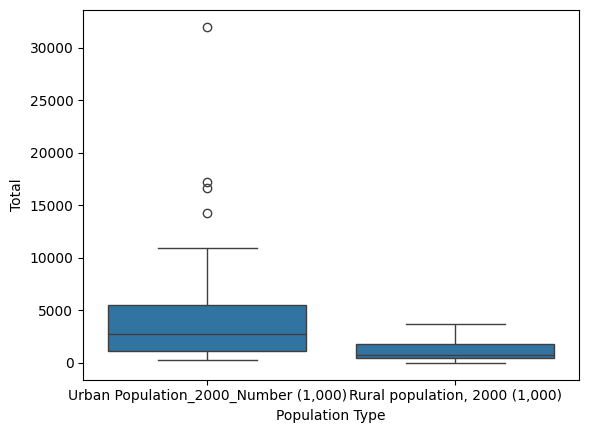

In [63]:
sns.boxplot(x='Population Type', y='Total', data=URP)
#plt.yscale('log')
plt.savefig('boxplotsURP.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [71]:
#Urban
urban_data = URP.loc[URP['Population Type'] == 'Urban Population_2000_Number (1,000)', 'Total'] # 1000 random values from a normal distribution
urban_data = pd.to_numeric(urban_data, errors='coerce') # Convert the Series directly to numeric

#Rural
Rural_data = URP.loc[URP['Population Type'] == 'Rural population, 2000 (1,000)', 'Total'] # 1000 random values from a normal distribution
Rural_data = pd.to_numeric(Rural_data, errors='coerce') # Convert the Series directly to numeric


In [49]:
urban_data.head(20)

,Total
0,31990
2,3633
4,2988
6,628
8,572
10,14270
12,5864
14,1108
16,859
18,10910


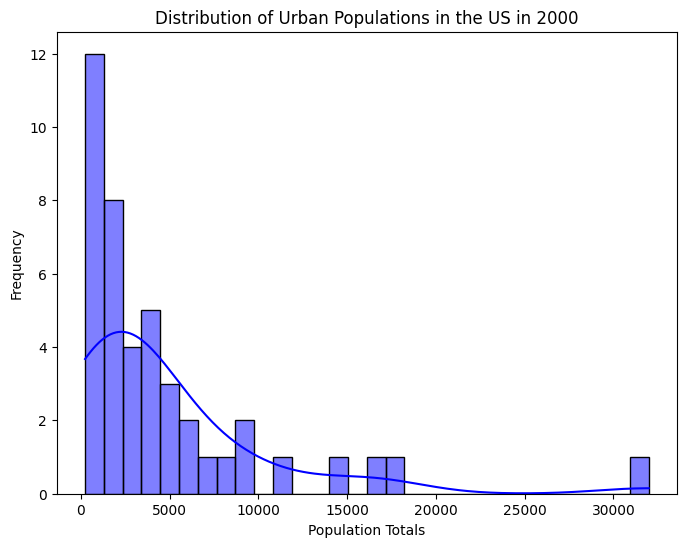

In [72]:
#Urban distribution
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
#urban_data = URP.loc[URP['Population Type'] == 'Urban Population_2000_Number (1,000)', 'Total'] # 1000 random values from a normal distribution

# Create histogram
plt.figure(figsize=(8, 6))
sns.histplot(urban_data, bins = 30, kde=True, color="blue")

# Add labels and title
plt.xlabel("Population Totals")
plt.ylabel("Frequency")
plt.title("Distribution of Urban Populations in the US in 2000")

plt.savefig('histogramurban.jpg', dpi=300, bbox_inches='tight')
plt.show()


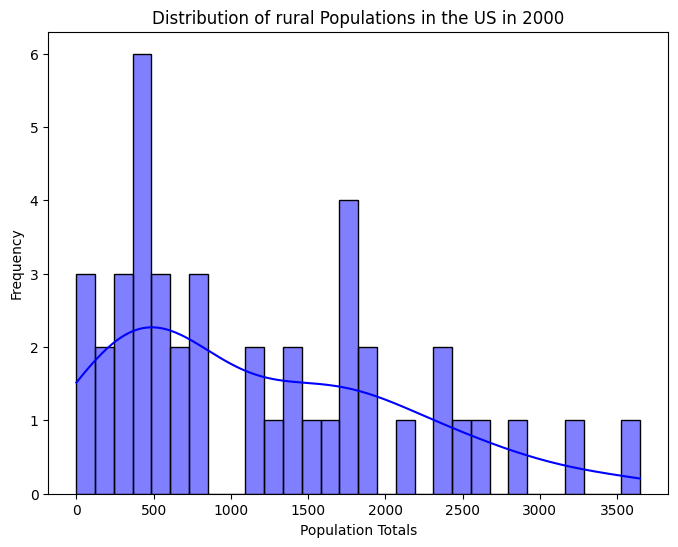

In [73]:
#Rural distribution
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
#urban_data = URP.loc[URP['Population Type'] == 'Urban Population_2000_Number (1,000)', 'Total'] # 1000 random values from a normal distribution

# Create histogram
plt.figure(figsize=(8, 6))
sns.histplot(Rural_data, bins = 30, kde=True, color="blue")

# Add labels and title
plt.xlabel("Population Totals")
plt.ylabel("Frequency")
plt.title("Distribution of rural Populations in the US in 2000")

plt.savefig('histogramrural.jpg', dpi=300, bbox_inches='tight')
plt.show()


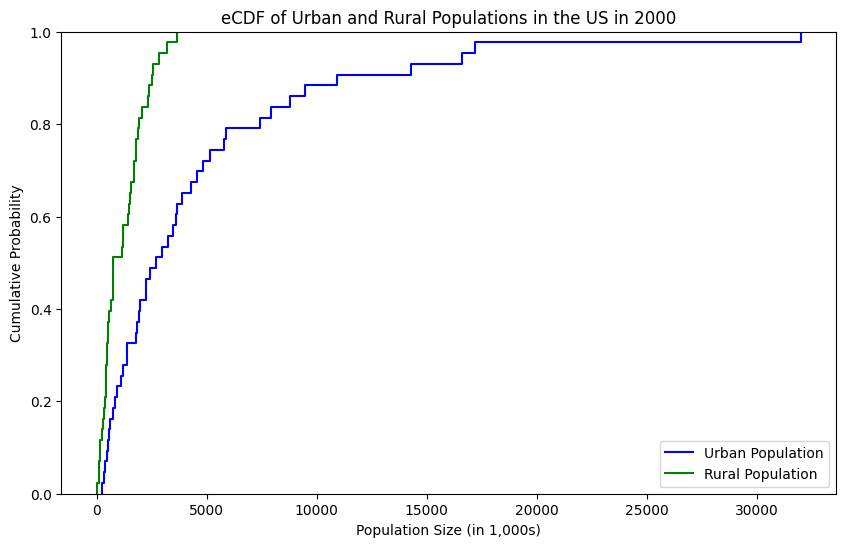

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for urban and rural populations in 2000
urban_data = URP.loc[URP['Population Type'] == 'Urban Population_2000_Number (1,000)', 'Total']
rural_data = URP.loc[URP['Population Type'] == 'Rural population, 2000 (1,000)', 'Total']

# Convert the 'Total' column to numeric, handling commas and errors
urban_data = pd.to_numeric(urban_data, errors='coerce')
rural_data = pd.to_numeric(rural_data, errors='coerce')

# Create a figure for plotting
plt.figure(figsize=(10, 6))

# Plot the urban population eCDF
sns.ecdfplot(urban_data, label="Urban Population", color="blue")

# Plot the rural population eCDF
sns.ecdfplot(rural_data, label="Rural Population", color="green")

# Add labels and title
plt.title("eCDF of Urban and Rural Populations in the US in 2000")
plt.xlabel("Population Size (in 1,000s)")
plt.ylabel("Cumulative Probability")

# Display the legend
plt.legend()

# Show plot
plt.savefig('URPeCDF.jpg', dpi=300, bbox_inches='tight')
plt.show()




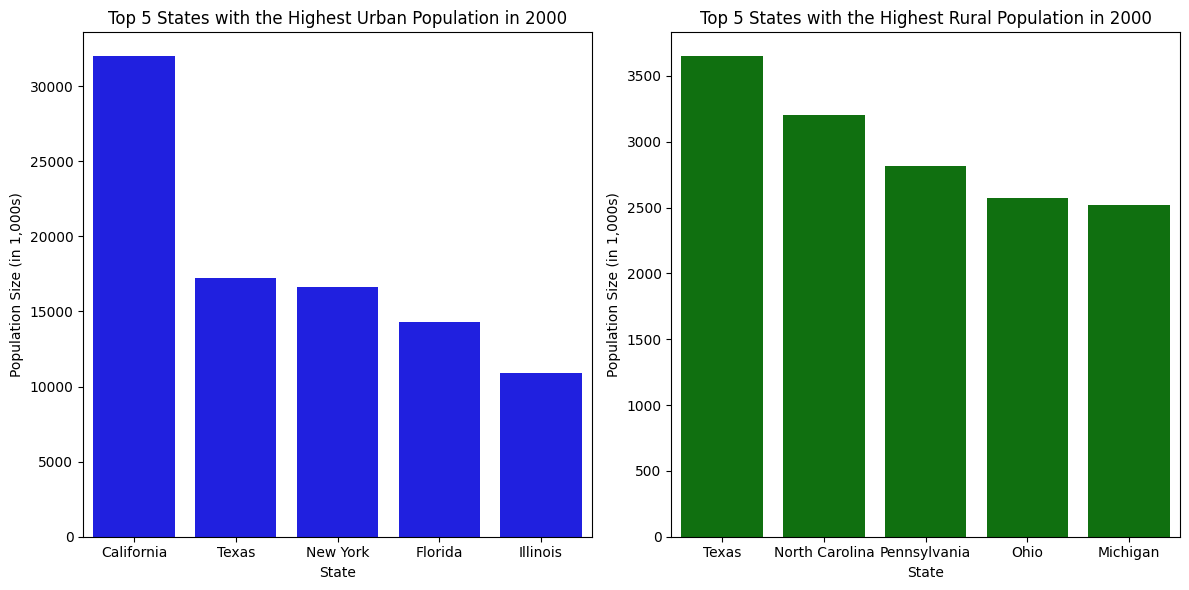

<Figure size 640x480 with 0 Axes>

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming URP is your DataFrame and it contains 'State', 'Population Type', and 'Total'

# Filter data for urban and rural populations
urban_data_state = URP.loc[URP['Population Type'] == 'Urban Population_2000_Number (1,000)', ['State', 'Total']]
rural_data_state = URP.loc[URP['Population Type'] == 'Rural population, 2000 (1,000)', ['State', 'Total']]

# Convert 'Total' column to numeric values, handling commas and errors
urban_data_state['Total'] = pd.to_numeric(urban_data_state['Total'], errors='coerce')
rural_data_state['Total'] = pd.to_numeric(rural_data_state['Total'], errors='coerce')

# Group by 'State' and sum the populations for each
urban_population_by_state = urban_data_state.groupby('State')['Total'].sum().sort_values(ascending=False).head(5)
rural_population_by_state = rural_data_state.groupby('State')['Total'].sum().sort_values(ascending=False).head(5)

# Create a figure for plotting
plt.figure(figsize=(12, 6))

# Plot the urban population bar chart
plt.subplot(1, 2, 1)  # (rows, columns, plot number)
sns.barplot(x=urban_population_by_state.index, y=urban_population_by_state.values, color='blue')
plt.title('Top 5 States with the Highest Urban Population in 2000')
plt.xlabel('State')
plt.ylabel('Population Size (in 1,000s)')

# Plot the rural population bar chart
plt.subplot(1, 2, 2)  # (rows, columns, plot number)
sns.barplot(x=rural_population_by_state.index, y=rural_population_by_state.values, color='green')
plt.title('Top 5 States with the Highest Rural Population in 2000')
plt.xlabel('State')
plt.ylabel('Population Size (in 1,000s)')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plots
plt.show()
plt.savefig('Highestpopbarcharts.jpg', dpi=300, bbox_inches='tight')
